# Linear Regression

In [1]:
import pandas as pd 
import numpy as np
from sklearn.datasets import load_boston,load_diabetes
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

In [2]:
boston_dataset = load_boston()

In [3]:
df = pd.DataFrame(data=boston_dataset['data'],columns=boston_dataset.feature_names)
df['target'] = boston_dataset["target"]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


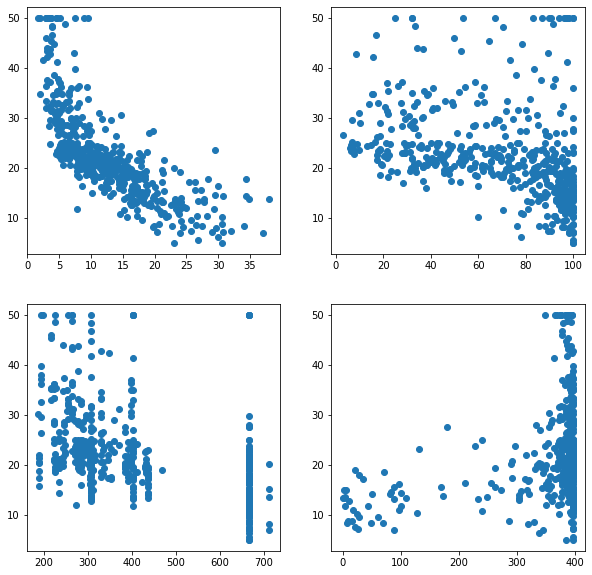

In [4]:
fig = plt.figure(figsize=(10,10))

fig.add_subplot(2,2,1).scatter(df["LSTAT"],df["target"])
fig.add_subplot(2,2,2).scatter(df["AGE"],df["target"])
fig.add_subplot(2,2,3).scatter(df["TAX"],df["target"])
fig.add_subplot(2,2,4).scatter(df["B"],df["target"])
plt.show()

- Shape of X
            
           X = (m,n)
           where 
               m = number of samples 
               n = number of features 


- choosing LSTAT for feature column X           
- setup X_0 (column 0 as 1) for linear regression ( θ_0 * X_0 + θ_1 * X_1  = θ_0 + θ_1 * X_1 )

In [5]:
def linear_model_format_X(X):
    if len(X.shape) == 1:
        X = X.copy().reshape(-1,1)
    
    return np.hstack(tup= ( np.ones(shape=(X.shape[0],1)) , X ) )

In [6]:
X_i = df['LSTAT'].values
X = linear_model_format_X(X_i)
y = df.target.values.reshape(-1,1)

print(X.shape, y.shape)

(506, 2) (506, 1)


In [7]:
n = X.shape[1]
m = y.shape[0]
print("number of columns (features) :",n)
print("number of samples (rows) :",m)

number of columns (features) : 2
number of samples (rows) : 506


## Using Gradient Descent

m = number of training samples(number of rows)
X = input features(matrix)
y = output target(matrix)


                training-set
                    |
                    V
                Learning algorithm
                    |
                    V
        test --->   h  ---> estimation
                (hypothesis)
        
        
`h(x) = θ_0 + θ_1 * X`

Affine Function = linear function + a constant

![linear_reg1](./images/linear_reg1.png)

In [8]:
def regression_cost_func(y_pred,y):
    return np.sum(np.square(y_pred - y)) / ( 2 * y_pred.shape[0])

### Gradient Descent Alogrithm

![linear_reg4](./images/linear_reg4.png)

### Gradient Descent intuition
![linear_reg2](./images/linear_reg2.png)

![linear_reg5](./images/linear_reg5.png)

In [9]:
def linear_regression_fit(X_i,y,alpha = 0.01,iterations = 10000):    
    X = linear_model_format_X(X_i)
    
    n = X.shape[1]
    m = y.shape[0]
    
    theta = np.random.rand(1,n) * 0.0001
    print("random initial θ value :",theta)

    cost_history = []
    theta_history = []

    for iteration in range(iterations):

        # calculate y_pred 
        y_pred = X @ theta.T # (m,1) = (m,n) * (n,1)

        # new θ to replace old θ
        new_theta = np.zeros_like(theta)

        # for linear regression with n = 2 
        # it will only run for θ at 0 column and θ at 1 column
        # simultaneous operation 
        new_theta = theta - (alpha * np.sum( ( y_pred - y ) * X, axis = 0 ) * (1 / m))

        if np.isnan(np.sum(new_theta)) or np.isinf(np.sum(new_theta)):
            print("breaking. found inf or nan.")
            break
        # override new θ 
        theta = new_theta

        # calculate cost to put in history
        cost = regression_cost_func( X @ theta.T, y)
        cost_history.append(cost)

        # calcualted theta in history
        theta_history.append(theta[0])
        
    y_pred = X @ theta.T
    return X,y,y_pred,theta,theta_history,cost_history

#### linear regression error function vs weights graph
![linear_reg3](./images/linear_reg3.png)

### debugging of gradient descent learning 

![linear_reg6](./images/linear_reg6.png)

if learning rate is big the theta value will shoot out.

### Mean Squared Error / Root Mean Squared Error

In [10]:
def mse_calculation(y_pred,y):
    m = y.shape[0]
    mean_squared_error = np.sum(np.square(y_pred - y)) * (1/m)
    return mean_squared_error,mean_squared_error ** (1/2)

### Code implemnentation

#### learning rate 0.01

random initial θ value : [[8.04418506e-05 1.11148706e-05]]


/home/nishant/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-8-69659341ffd9>:2: RuntimeWarning: overflow encountered in square
  return np.sum(np.square(y_pred - y)) / ( 2 * y_pred.shape[0])


breaking. found inf or nan.
MSE : inf RMSE : inf
trained θ value : [[-1.01799004e+302 -1.69559818e+303]]


<ipython-input-10-0024ddfb6611>:3: RuntimeWarning: overflow encountered in square
  mean_squared_error = np.sum(np.square(y_pred - y)) * (1/m)


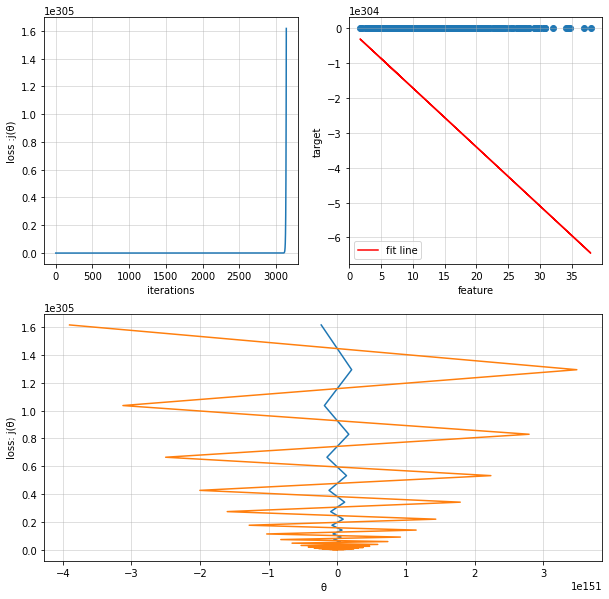

In [11]:
X_i = df['LSTAT'].values
y = df.target.values.reshape(-1,1)

X,y,y_pred,theta,theta_history,cost_history = linear_regression_fit(X_i,y,alpha = 0.01,iterations = 10000)


mse,rmse = mse_calculation(y_pred,y)

print("MSE :",mse,"RMSE :",rmse)

print("trained θ value :",theta)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,2,1)
ax.set(
    xlabel="iterations",
    ylabel="loss :j(θ)"
)
ax.plot(cost_history)
ax.grid(alpha=0.5)

ax = fig.add_subplot(2,2,2)
ax.set(
    xlabel="feature",
    ylabel="target"
)
ax.scatter(X_i,y)
ax.plot(X_i,y_pred,c='r',label="fit line")
ax.legend(loc="best")
ax.grid(alpha=0.5)

ax = fig.add_subplot(2,2,(3,4))
ax.set(
    ylabel="loss: j(θ)",
    xlabel="θ"
)
ax.plot(theta_history,cost_history)
ax.grid(alpha=0.5)
plt.show()

- learning rate is high based on the data, and θ didn't converge and loss increased

#### learning rate 0.001

random initial θ value : [[9.24410535e-05 4.08985921e-05]]
MSE : 40.826293872567156 RMSE : 6.389545670277908
trained θ value : [[31.43698039 -0.76292171]]


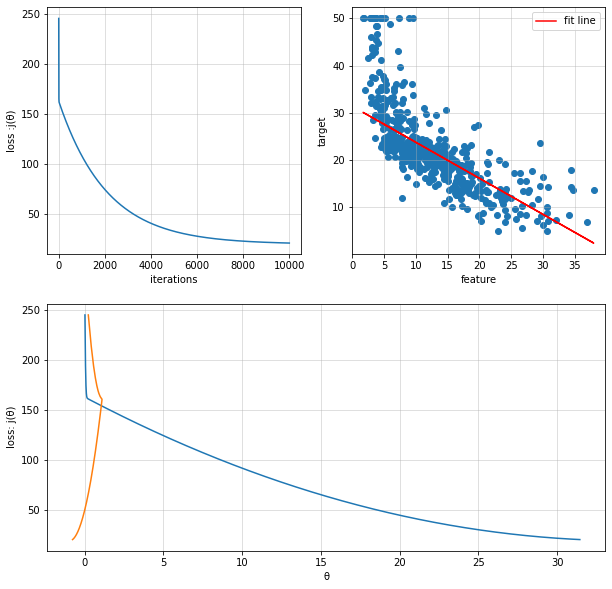

In [12]:
X_i = df['LSTAT'].values
y = df.target.values.reshape(-1,1)

X,y,y_pred,theta,theta_history,cost_history = linear_regression_fit(X_i,y,alpha = 0.001,iterations = 10000)

mse,rmse = mse_calculation(y_pred,y)

print("MSE :",mse,"RMSE :",rmse)

print("trained θ value :",theta)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,2,1)
ax.set(
    xlabel="iterations",
    ylabel="loss :j(θ)"
)
ax.plot(cost_history)
ax.grid(alpha=0.5)

ax = fig.add_subplot(2,2,2)
ax.set(
    xlabel="feature",
    ylabel="target"
)
ax.scatter(X_i,y)
ax.plot(X_i,y_pred,c='r',label="fit line")
ax.legend(loc="best")
ax.grid(alpha=0.5)

ax = fig.add_subplot(2,2,(3,4))
ax.set(
    ylabel="loss: j(θ)",
    xlabel="θ"
)
ax.plot(theta_history,cost_history)
ax.grid(alpha=0.5)
plt.show()

#### learning rate 0.003

random initial θ value : [[3.05854832e-05 6.43579910e-06]]
MSE : 38.4831230422558 RMSE : 6.203476689909925
trained θ value : [[34.52842519 -0.94852347]]


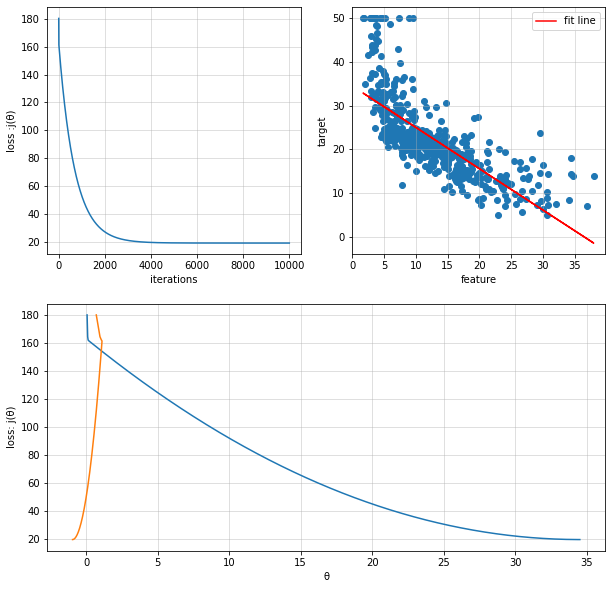

In [13]:
X_i = df['LSTAT'].values
y = df.target.values.reshape(-1,1)

X,y,y_pred,theta,theta_history,cost_history = linear_regression_fit(X_i,y,alpha = 0.003,iterations = 10000)

mse,rmse = mse_calculation(y_pred,y)

print("MSE :",mse,"RMSE :",rmse)

print("trained θ value :",theta)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,2,1)
ax.set(
    xlabel="iterations",
    ylabel="loss :j(θ)"
)
ax.plot(cost_history)
ax.grid(alpha=0.5)

ax = fig.add_subplot(2,2,2)
ax.set(
    xlabel="feature",
    ylabel="target"
)
ax.scatter(X_i,y)
ax.plot(X_i,y_pred,c='r',label="fit line")
ax.legend(loc="best")
ax.grid(alpha=0.5)

ax = fig.add_subplot(2,2,(3,4))
ax.set(
    ylabel="loss: j(θ)",
    xlabel="θ"
)
ax.plot(theta_history,cost_history)
ax.grid(alpha=0.5)
plt.show()

- 0.003 > 0.001. So on 0.003 it will converge earlier. 

## Using Normal Equation


`normal equation vs gradient descent`

| Gradient Descent | Normal Equation | 
| - | - | 
| Need to choose learning rate alpha | no need to choose alpha |
| needs iteration | doesn't need iterations |
| large features workds well ( n large ) | computation increases for large n |
| feature scaling will help in convergence | no need to do feature scaling |


```
θ = (X^T * X)^-1 * X^T * y
```

In [14]:
X_i = df['LSTAT'].values
X = linear_model_format_X(X_i)
y = df.target.values.reshape(-1,1)

print(X.shape, y.shape)

(506, 2) (506, 1)


In [15]:
theta = np.linalg.inv(X.T @ X) @ X.T @ y

theta.shape

(2, 1)

In [16]:
y_pred = X @ theta

y_pred.shape

(506, 1)

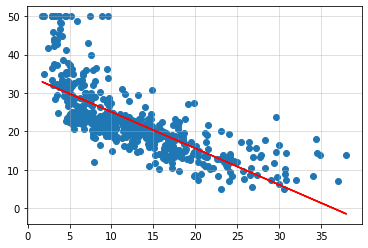

In [17]:
fig,ax = plt.subplots(1,1)
ax.scatter(X_i,y)
ax.plot(X_i,y_pred,c='r')
ax.grid(alpha=0.5)
plt.show()

# Ridge(L2 Regularization) Regression

- Regularization
    - keep all features, but reduce magnitude/ values of paramter θ_j
    - Workes well when we have a lot of features, each of which contributes a bit to predicting y.
 
![regularization_reg1](./images/regularization_reg1.png)

![regularization_reg3](./images/regularization_reg3.png)

![regularization_reg_2](./images/regularization_reg2.png)

In [18]:
def ridge_regression_fit(X_i,y,alpha = 0.01,iterations = 10000,penalty=0.1):    
    X = linear_model_format_X(X_i)
    
    n = X.shape[1]
    m = y.shape[0]
    
    theta = np.random.rand(1,n) * 0.001
    print("random initial θ value :",theta)

    cost_history = []
    theta_history = []

    for iteration in range(iterations):

        # calculate y_pred 
        y_pred = X @ theta.T # (m,1) = (m,n) * (n,1)

        # new θ to replace old θ
        new_theta = np.zeros_like(theta)

        # for linear regression with n = 2 
        # it will only run for θ at 0 column and θ at 1 column
        # simultaneous operation 
        new_theta = theta - (alpha * np.sum( ( y_pred - y ) * X, axis = 0 ) * (1 / m)) -  (penalty * theta * (1 / m) )

        if np.isnan(np.sum(new_theta)) or np.isinf(np.sum(new_theta)):
            print("breaking. found inf or nan.")
            break
        # override new θ 
        theta = new_theta

        # calculate cost to put in history
        cost = regression_cost_func( X @ theta.T, y)
        cost_history.append(cost)

        # calcualted theta in history
        theta_history.append(theta[0])
        
    y_pred = X @ theta.T
    return X,y,y_pred,theta,theta_history,cost_history

random initial θ value : [[0.00066631 0.00092547]]
MSE : 51.7693731599088 RMSE : 7.195093686666547
trained θ value : [[27.13210476 -0.50481865]]


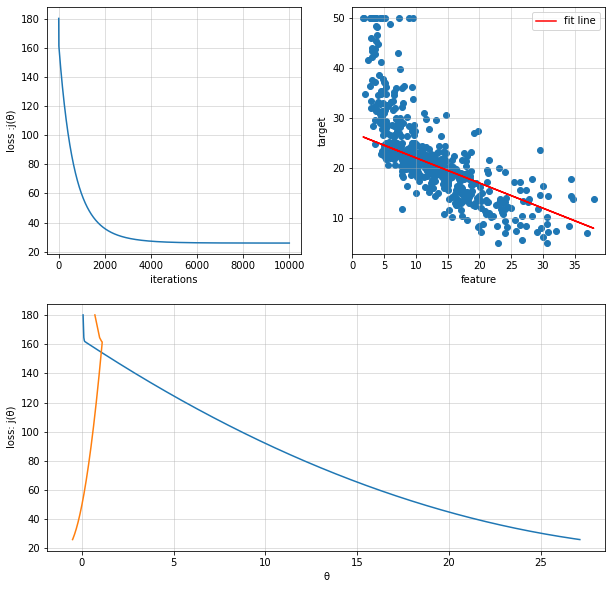

In [19]:
X_i = df['LSTAT'].values
y = df.target.values.reshape(-1,1)

X,y,y_pred,theta,theta_history,cost_history = ridge_regression_fit(X_i,y,alpha = 0.003,iterations = 10000,penalty=0.1)

mse,rmse = mse_calculation(y_pred,y)

print("MSE :",mse,"RMSE :",rmse)

print("trained θ value :",theta)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,2,1)
ax.set(
    xlabel="iterations",
    ylabel="loss :j(θ)"
)
ax.plot(cost_history)
ax.grid(alpha=0.5)

ax = fig.add_subplot(2,2,2)
ax.set(
    xlabel="feature",
    ylabel="target"
)
ax.scatter(X_i,y)
ax.plot(X_i,y_pred,c='r',label="fit line")
ax.legend(loc="best")
ax.grid(alpha=0.5)

ax = fig.add_subplot(2,2,(3,4))
ax.set(
    ylabel="loss: j(θ)",
    xlabel="θ"
)
ax.plot(theta_history,cost_history)
ax.grid(alpha=0.5)
plt.show()

## Using Normal Equation

```
θ = (X^T * X + lambda * I)^-1 * X^T * y
```

In [20]:
X_i = df['LSTAT'].values
X = linear_model_format_X(X_i)
y = df.target.values.reshape(-1,1)

In [21]:
penalty = 0.1

theta = np.linalg.inv(X.T @ X + (penalty * np.identity(X.shape[1]) ) ) @ X.T @ y

theta.shape

(2, 1)

In [22]:
y_pred = X @ theta

y_pred.shape

(506, 1)

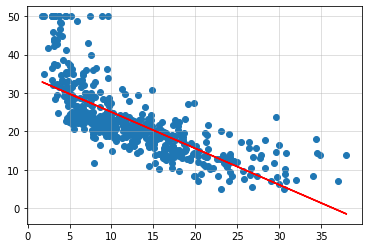

In [23]:
fig,ax = plt.subplots(1,1)
ax.scatter(X_i,y)
ax.plot(X_i,y_pred,c='r')
ax.grid(alpha=0.5)
plt.show()

# Lasso(L1 Regularization) Regression

Ridge regression does have one obvious disadvantage. Unlike best subset,forward stepwise, and backward stepwise selection, which will generallyselect models that involve just a subset of the variables, ridge regressionwill include allppredictors in the final model. The penalty will shrink all of the coefficients towards zero, but it will not set any of themexactly to zero (unlessλ=∞). This may not be a problem for predictionaccuracy, but it can create a challenge in model interpretation in settings inwhich the number of variables n is quite large.

Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are scost_historyk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters).

![regularization_reg4](./images/regularization_reg4.png)

In [24]:
def lasso_regression_fit(X_i,y,alpha = 0.01,iterations = 10000,penalty=0.1):
    
    X = linear_model_format_X(X_i)
    
    n = X.shape[1]
    m = y.shape[0]
    
    theta = np.random.rand(1,n) * 0.001
    print("random initial θ value :",theta)

    cost_history = []
    theta_history = []

    for iteration in range(iterations):

        # calculate y_pred 
        y_pred = X @ theta.T # (m,1) = (m,n) * (n,1)

        # new θ to replace old θ
        new_theta = np.zeros_like(theta)

        # for linear regression with n = 2 
        # it will only run for θ at 0 column and θ at 1 column
        # simultaneous operation 
        new_theta = theta - (alpha * np.sum( ( y_pred - y ) * X, axis = 0 ) * (1 / m)) - (penalty / m)  

        if np.isnan(np.sum(new_theta)) or np.isinf(np.sum(new_theta)):
            print("breaking. found inf or nan.")
            break
        # override new θ
        theta = new_theta

        # calculate cost to put in history
        cost = regression_cost_func( X @ theta.T, y)
        cost_history.append(cost)

        # calcualted θ in history
        theta_history.append(theta[0])
        
    y_pred = X @ theta.T
    return X,y,y_pred,theta,theta_history,cost_history

random initial θ value : [[0.00058883 0.00017421]]
MSE : 38.50216342980301 RMSE : 6.205011154688041
trained θ value : [[34.27188624 -0.93345136]]


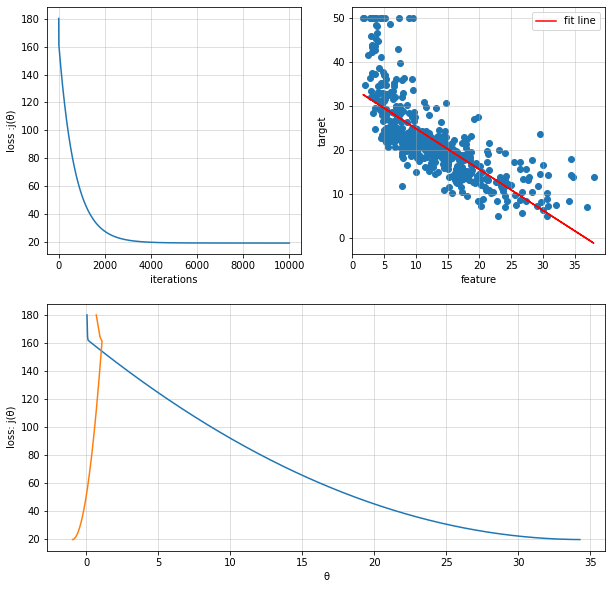

In [25]:
X_i = df['LSTAT'].values
y = df.target.values.reshape(-1,1)

X,y,y_pred,theta,theta_history,cost_history = lasso_regression_fit(X_i,y,alpha = 0.003,iterations = 10000,penalty=0.1)

mse,rmse = mse_calculation(y_pred,y)

print("MSE :",mse,"RMSE :",rmse)

print("trained θ value :",theta)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,2,1)
ax.set(
    xlabel="iterations",
    ylabel="loss :j(θ)"
)
ax.plot(cost_history)
ax.grid(alpha=0.5)

ax = fig.add_subplot(2,2,2)
ax.set(
    xlabel="feature",
    ylabel="target"
)
ax.scatter(X_i,y)
ax.plot(X_i,y_pred,c='r',label="fit line")
ax.legend(loc="best")
ax.grid(alpha=0.5)

ax = fig.add_subplot(2,2,(3,4))
ax.set(
    ylabel="loss: j(θ)",
    xlabel="θ"
)
ax.plot(theta_history,cost_history)
ax.grid(alpha=0.5)
plt.show()

# Comparing Linear, Lasso, Ridge Regression 

## Data 1 model analysis 

In [26]:
X_i = df[["RM","AGE","DIS","LSTAT"]].values
y = boston_dataset.target.reshape(-1,1)

X_i.shape,y.shape

((506, 4), (506, 1))

In [27]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_i,y,random_state=42,test_size=30)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((476, 4), (30, 4), (476, 1), (30, 1))

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_train)

X_scaled_test = linear_model_format_X(X=scaler.transform(X_test))

X_scaled.shape,X_scaled_test.shape

((476, 4), (30, 5))

### linear regression model training

random initial θ value : [[1.25051685e-06 8.89891622e-06 3.71457860e-05 5.12468310e-06
  4.26050495e-05]]
MSE : 30.304580245715616 RMSE : 5.5049596043672855
trained θ value : [[22.69146734  3.53757466 -0.67498203 -1.42075235 -4.91623857]]


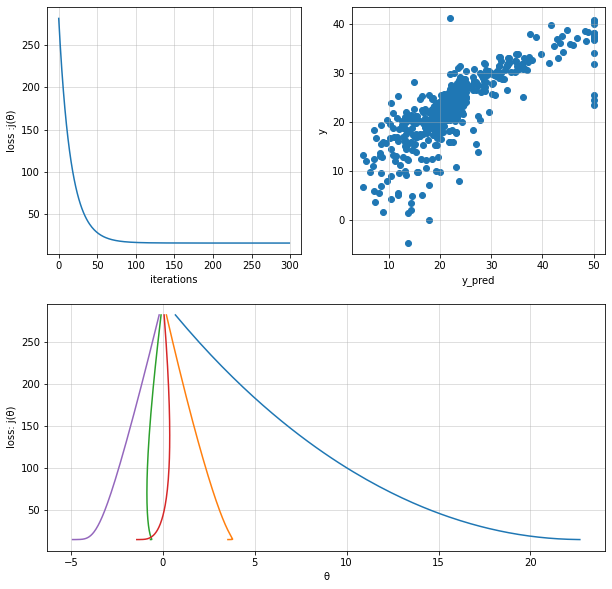

In [29]:
X_linear,y_linear,y_pred_linear,theta_linear,theta_history_linear,cost_history_linear = linear_regression_fit(
    X_scaled,
    y_train,
    alpha = 0.03,
    iterations = 300
)

mse,rmse = mse_calculation(y_pred_linear,y_linear)

print("MSE :",mse,"RMSE :",rmse)

print("trained θ value :",theta_linear)


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,2,1)
ax.set(
    xlabel="iterations",
    ylabel="loss :j(θ)"
)
ax.plot(cost_history_linear)
ax.grid(alpha=0.5)


ax = fig.add_subplot(2,2,2)
ax.set(
    xlabel="y_pred",
    ylabel="y"
)

ax.scatter(y_linear,y_pred_linear)
ax.grid(alpha=0.5)

ax = fig.add_subplot(2,2,(3,4))
ax.set(
    ylabel="loss: j(θ)",
    xlabel="θ"
)
ax.plot(theta_history_linear,cost_history_linear)
ax.grid(alpha=0.5)
plt.show()

### lasso regression model training

random initial θ value : [[9.01604597e-05 8.73874101e-05 5.84124297e-04 5.14242166e-04
  3.45198981e-05]]
MSE : 30.30156259203043 RMSE : 5.504685512545692
trained θ value : [[22.6844653   3.5201872  -0.69447383 -1.44776481 -4.93534523]]


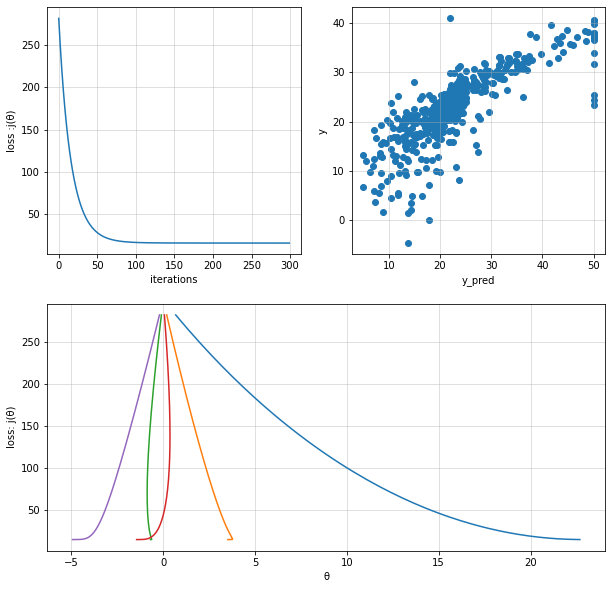

In [30]:
X_lasso,y_lasso,y_pred_lasso,theta_lasso,theta_history_lasso,cost_history_lasso = lasso_regression_fit(
    X_scaled,
    y_train,
    alpha = 0.03,
    iterations = 300
)

mse,rmse = mse_calculation(y_pred_lasso,y_lasso)

print("MSE :",mse,"RMSE :",rmse)

print("trained θ value :",theta_lasso)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,2,1)
ax.set(
    xlabel="iterations",
    ylabel="loss :j(θ)"
)
ax.plot(cost_history_lasso)
ax.grid(alpha=0.5)

ax = fig.add_subplot(2,2,2)
ax.set(
    xlabel="y_pred",
    ylabel="y"
)
ax.scatter(y_lasso,y_pred_lasso)
ax.grid(alpha=0.5)


ax = fig.add_subplot(2,2,(3,4))
ax.set(
    ylabel="loss: j(θ)",
    xlabel="θ"
)
ax.plot(theta_history_lasso,cost_history_lasso)
ax.grid(alpha=0.5)
plt.show()

### ridge regression model training

random initial θ value : [[1.25960940e-04 5.74222278e-05 7.32830794e-05 8.79498029e-04
  4.46888326e-04]]
MSE : 30.33614860350387 RMSE : 5.507826123209035
trained θ value : [[22.53382101  3.53190596 -0.67389732 -1.38889558 -4.87237357]]


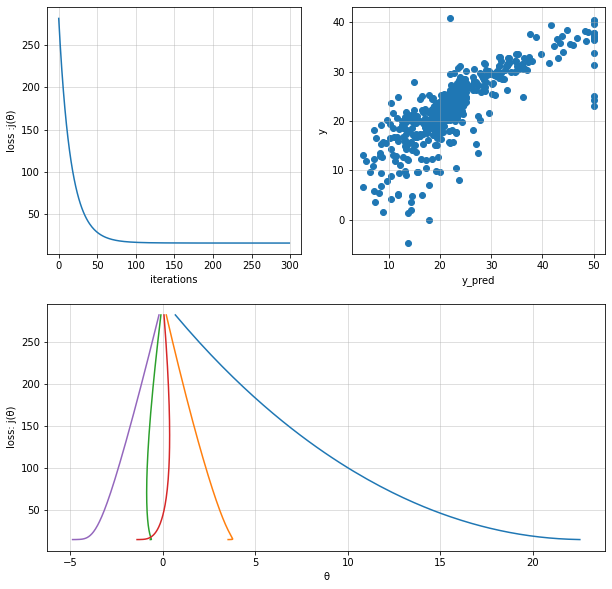

In [31]:
X_ridge,y_ridge,y_pred_ridge,theta_ridge,theta_history_ridge,cost_history_ridge = ridge_regression_fit(
    X_scaled,
    y_train,
    alpha = 0.03,
    iterations = 300
)

mse,rmse = mse_calculation(y_pred_ridge,y_ridge)

print("MSE :",mse,"RMSE :",rmse)

print("trained θ value :",theta_ridge)


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,2,1)
ax.set(
    xlabel="iterations",
    ylabel="loss :j(θ)"
)
ax.plot(cost_history_ridge)
ax.grid(alpha=0.5)

ax = fig.add_subplot(2,2,2)
ax.set(
    xlabel="y_pred",
    ylabel="y"
)
ax.scatter(y_ridge,y_pred_ridge)
ax.grid(alpha=0.5)


ax = fig.add_subplot(2,2,(3,4))
ax.set(
    ylabel="loss: j(θ)",
    xlabel="θ"
)
ax.plot(theta_history_ridge,cost_history_ridge)
ax.grid(alpha=0.5)
plt.show()

### linear regression model testing error

In [32]:
y_test_pred_linear = X_scaled_test @ theta_linear.T
mse,rmse = mse_calculation(y_test_pred_linear,y_test)
print("MSE :",mse,"RMSE :",rmse)

MSE : 19.026996178096468 RMSE : 4.361994518347824


### ridge regression model testing error

In [33]:
y_test_pred_ridge = X_scaled_test @ theta_ridge.T
mse,rmse = mse_calculation(y_test_pred_ridge,y_test)
print("MSE :",mse,"RMSE :",rmse)

MSE : 18.860905179425195 RMSE : 4.342914364735413


### lasso regression model testing error

In [34]:
y_test_pred_lasso = X_scaled_test @ theta_lasso.T
mse,rmse = mse_calculation(y_test_pred_lasso,y_test)
print("MSE :",mse,"RMSE :",rmse)

MSE : 19.08656754781708 RMSE : 4.368817637280947


### training data comparison

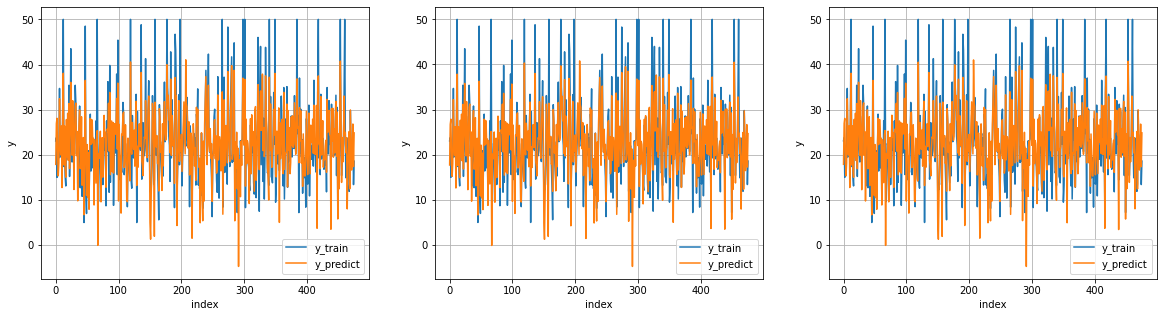

In [35]:
fig = plt.figure(figsize=(20,5))

ax = fig.add_subplot(1,3,1)
ax.set(xlabel="index",ylabel="y")
ax.plot(y_train,label="y_train")
ax.plot(y_pred_linear,label="y_predict")
ax.legend(loc="best")
ax.grid()

ax = fig.add_subplot(1,3,2)
ax.set(xlabel="index",ylabel="y")
ax.plot(y_train,label="y_train")
ax.plot(y_pred_ridge,label="y_predict")
ax.legend(loc="best")
ax.grid()

ax = fig.add_subplot(1,3,3)
ax.set(xlabel="index",ylabel="y")
ax.plot(y_train,label="y_train")
ax.plot(y_pred_lasso,label="y_predict")
ax.legend(loc="best")
ax.grid()

plt.show()

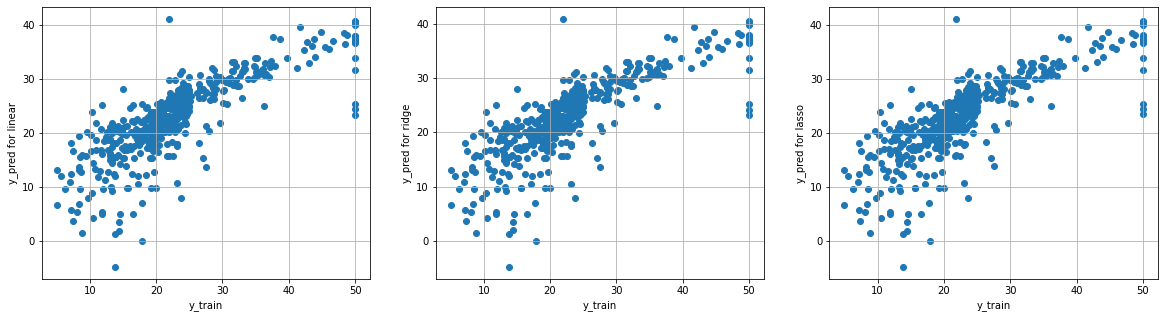

In [36]:
fig = plt.figure(figsize=(20,5))

ax = fig.add_subplot(1,3,1)
ax.set(xlabel="y_train",ylabel="y_pred for linear")
ax.scatter(y_train,y_pred_linear)
ax.grid()

ax = fig.add_subplot(1,3,2)
ax.set(xlabel="y_train",ylabel="y_pred for ridge")
ax.scatter(y_train,y_pred_ridge)
ax.grid()

ax = fig.add_subplot(1,3,3)
ax.set(xlabel="y_train",ylabel="y_pred for lasso")
ax.scatter(y_train,y_pred_lasso)
ax.grid()

plt.show()

### testing data comparison

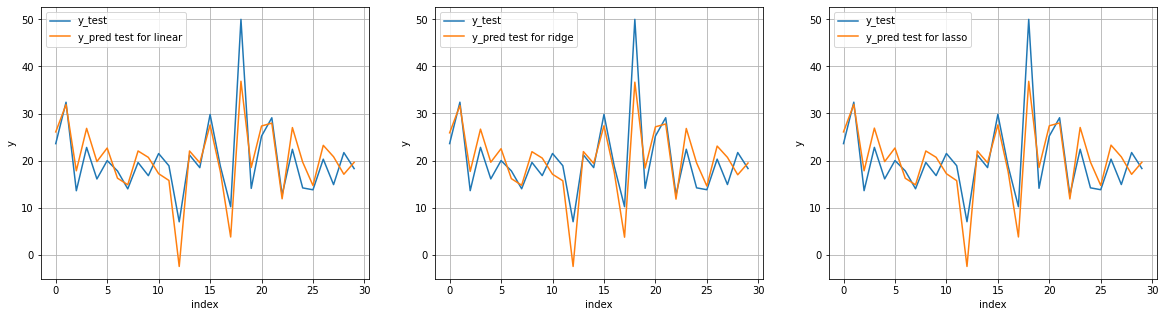

In [37]:
fig = plt.figure(figsize=(20,5))

ax = fig.add_subplot(1,3,1)
ax.set(xlabel="index",ylabel="y")
ax.plot(y_test,label="y_test")
ax.plot(y_test_pred_linear,label="y_pred test for linear")
ax.legend(loc="best")
ax.grid()

ax = fig.add_subplot(1,3,2)
ax.set(xlabel="index",ylabel="y")
ax.plot(y_test,label="y_test")
ax.plot(y_test_pred_ridge,label="y_pred test for ridge")
ax.legend(loc="best")
ax.grid()

ax = fig.add_subplot(1,3,3)
ax.set(xlabel="index",ylabel="y")
ax.plot(y_test,label="y_test")
ax.plot(y_test_pred_lasso,label="y_pred test for lasso")
ax.legend(loc="best")
ax.grid()


plt.show()

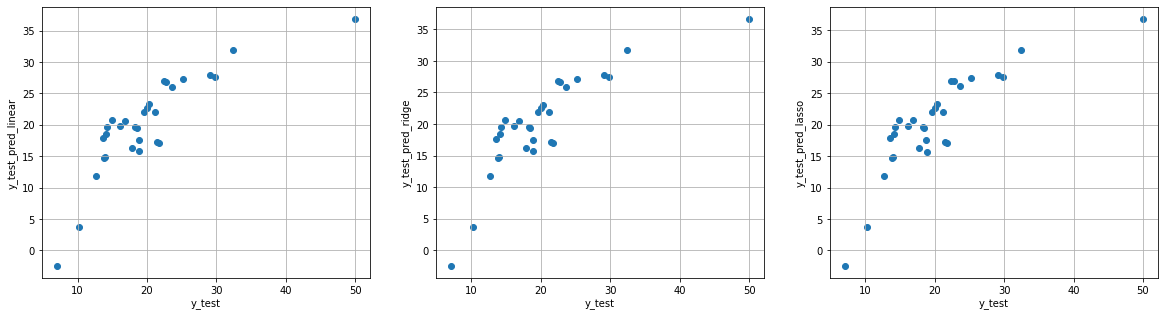

In [38]:
fig = plt.figure(figsize=(20,5))

ax = fig.add_subplot(1,3,1)
ax.set(xlabel="y_test",ylabel="y_test_pred_linear")
ax.scatter(y_test,y_test_pred_linear)
ax.grid()

ax = fig.add_subplot(1,3,2)
ax.set(xlabel="y_test",ylabel="y_test_pred_ridge")
ax.scatter(y_test,y_test_pred_ridge)
ax.grid()

ax = fig.add_subplot(1,3,3)
ax.set(xlabel="y_test",ylabel="y_test_pred_lasso")
ax.scatter(y_test,y_test_pred_lasso)
ax.grid()

plt.show()

### models comparison

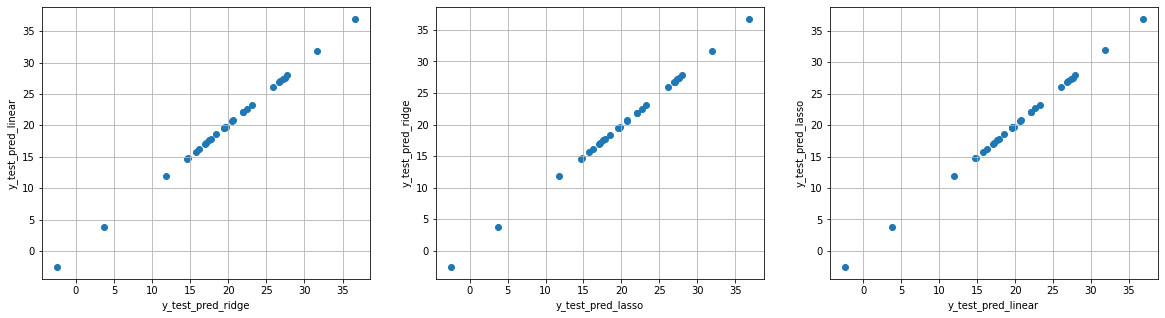

In [39]:
fig = plt.figure(figsize=(20,5))

ax = fig.add_subplot(1,3,1)
ax.set(xlabel="y_test_pred_ridge",ylabel="y_test_pred_linear")
ax.scatter(y_test_pred_ridge,y_test_pred_linear)
ax.grid()

ax = fig.add_subplot(1,3,2)
ax.set(xlabel="y_test_pred_lasso",ylabel="y_test_pred_ridge")
ax.scatter(y_test_pred_lasso,y_test_pred_ridge)
ax.grid()

ax = fig.add_subplot(1,3,3)
ax.set(xlabel="y_test_pred_linear",ylabel="y_test_pred_lasso")
ax.scatter(y_test_pred_linear,y_test_pred_lasso)
ax.grid()

plt.show()

## Data 2 models analysis

Data Set Information:

The NASA data set comprises different size NACA 0012 airfoils at various wind tunnel speeds and angles of attack. The span of the airfoil and the observer position were the same in all of the experiments.

Attribute Information:

This problem has the following inputs:

1. Frequency, in Hertzs.
2. Angle of attack, in degrees.
3. Chord length, in meters.
4. Free-stream velocity, in meters per second.
5. Suction side displacement thickness, in meters.

The only output is:

6. Scaled sound pressure level, in decibels. 

In [40]:
cols = ["freq",'angle','chord_length','free_stream_vel','disp_thick','pressure_level']
df = pd.read_csv("./datasets/airfoil_self_noise.dat",sep="\t",names=cols)

In [41]:
X_i = df[["freq",'angle','chord_length','free_stream_vel','disp_thick']].values
y = df['pressure_level'].values.reshape(-1,1)

X_i.shape,y.shape

((1503, 5), (1503, 1))

In [42]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_i,y,random_state=42,test_size=30)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1473, 5), (30, 5), (1473, 1), (30, 1))

In [43]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_train)

X_scaled_test = linear_model_format_X(X=scaler.transform(X_test))

X_scaled.shape,X_scaled_test.shape

((1473, 5), (30, 6))

### linear regression model training

random initial θ value : [[6.95632554e-05 9.21834240e-05 1.60509997e-05 9.59367089e-05
  4.68060188e-05 8.70487065e-06]]
MSE : 23.004795384131825 RMSE : 4.79633145061221
trained θ value : [[124.81857711  -3.9912807   -2.154421    -3.20125218   1.48042963
   -2.19175048]]


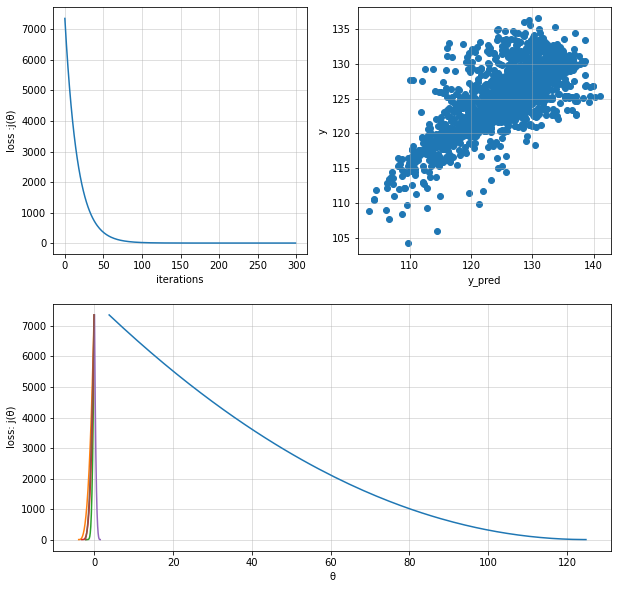

In [44]:
X_linear,y_linear,y_pred_linear,theta_linear,theta_history_linear,cost_history_linear = linear_regression_fit(
    X_scaled,
    y_train,
    alpha = 0.03,
    iterations = 300
)

mse,rmse = mse_calculation(y_pred_linear,y_linear)

print("MSE :",mse,"RMSE :",rmse)

print("trained θ value :",theta_linear)


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,2,1)
ax.set(
    xlabel="iterations",
    ylabel="loss :j(θ)"
)
ax.plot(cost_history_linear)
ax.grid(alpha=0.5)


ax = fig.add_subplot(2,2,2)
ax.set(
    xlabel="y_pred",
    ylabel="y"
)

ax.scatter(y_linear,y_pred_linear)
ax.grid(alpha=0.5)

ax = fig.add_subplot(2,2,(3,4))
ax.set(
    ylabel="loss: j(θ)",
    xlabel="θ"
)
ax.plot(theta_history_linear,cost_history_linear)
ax.grid(alpha=0.5)
plt.show()

### lasso regression model training

random initial θ value : [[5.83380710e-04 1.48193147e-04 5.83287749e-05 9.84483511e-05
  8.35601735e-04 8.69967886e-04]]
MSE : 23.003899424322388 RMSE : 4.796238049171704
trained θ value : [[124.81631446  -3.99483788  -2.1595777   -3.20616594   1.47895748
   -2.19218206]]


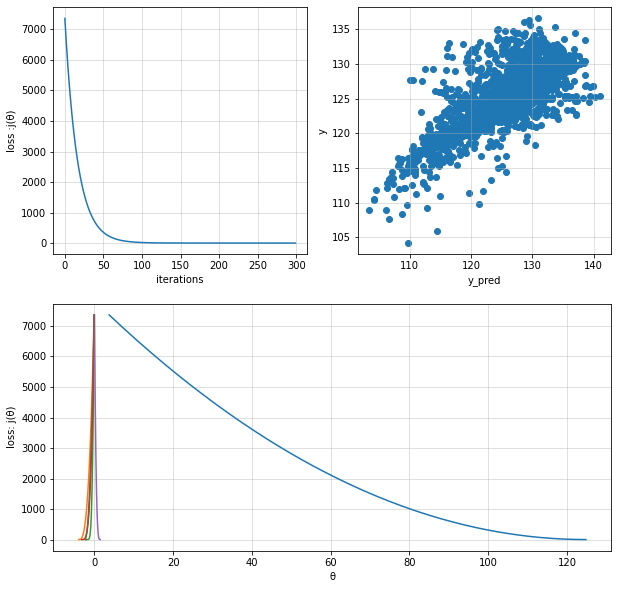

In [45]:
X_lasso,y_lasso,y_pred_lasso,theta_lasso,theta_history_lasso,cost_history_lasso = lasso_regression_fit(
    X_scaled,
    y_train,
    alpha = 0.03,
    iterations = 300
)

mse,rmse = mse_calculation(y_pred_lasso,y_lasso)

print("MSE :",mse,"RMSE :",rmse)

print("trained θ value :",theta_lasso)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,2,1)
ax.set(
    xlabel="iterations",
    ylabel="loss :j(θ)"
)
ax.plot(cost_history_lasso)
ax.grid(alpha=0.5)

ax = fig.add_subplot(2,2,2)
ax.set(
    xlabel="y_pred",
    ylabel="y"
)
ax.scatter(y_lasso,y_pred_lasso)
ax.grid(alpha=0.5)


ax = fig.add_subplot(2,2,(3,4))
ax.set(
    ylabel="loss: j(θ)",
    xlabel="θ"
)
ax.plot(theta_history_lasso,cost_history_lasso)
ax.grid(alpha=0.5)
plt.show()

### ridge regression model training

random initial θ value : [[0.000118   0.00065939 0.00011808 0.00020341 0.00081846 0.00079379]]
MSE : 23.094598136899272 RMSE : 4.805683940595685
trained θ value : [[124.53703427  -3.97768387  -2.14182409  -3.18761985   1.47461369
   -2.18918409]]


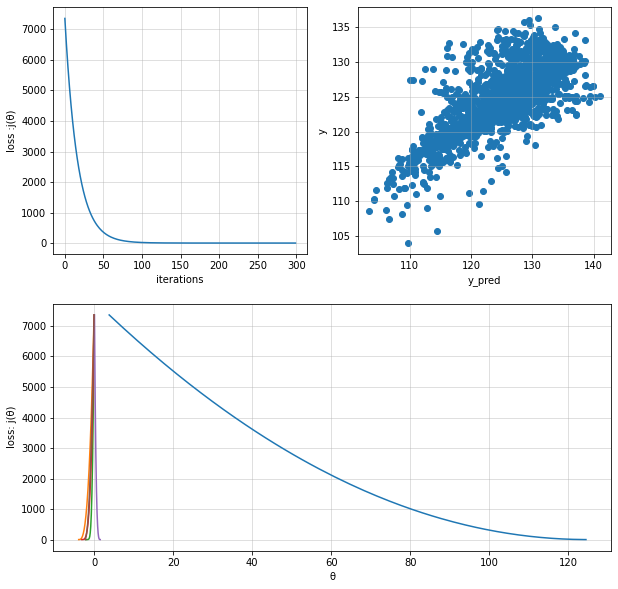

In [46]:
X_ridge,y_ridge,y_pred_ridge,theta_ridge,theta_history_ridge,cost_history_ridge = ridge_regression_fit(
    X_scaled,
    y_train,
    alpha = 0.03,
    iterations = 300
)

mse,rmse = mse_calculation(y_pred_ridge,y_ridge)

print("MSE :",mse,"RMSE :",rmse)

print("trained θ value :",theta_ridge)


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,2,1)
ax.set(
    xlabel="iterations",
    ylabel="loss :j(θ)"
)
ax.plot(cost_history_ridge)
ax.grid(alpha=0.5)

ax = fig.add_subplot(2,2,2)
ax.set(
    xlabel="y_pred",
    ylabel="y"
)
ax.scatter(y_ridge,y_pred_ridge)
ax.grid(alpha=0.5)


ax = fig.add_subplot(2,2,(3,4))
ax.set(
    ylabel="loss: j(θ)",
    xlabel="θ"
)
ax.plot(theta_history_ridge,cost_history_ridge)
ax.grid(alpha=0.5)
plt.show()

### linear regression model testing error

In [47]:
y_test_pred_linear = X_scaled_test @ theta_linear.T
mse,rmse = mse_calculation(y_test_pred_linear,y_test)
print("MSE :",mse,"RMSE :",rmse)

MSE : 26.359782410565714 RMSE : 5.1341778709512695


### ridge regression model testing error

In [48]:
y_test_pred_ridge = X_scaled_test @ theta_ridge.T
mse,rmse = mse_calculation(y_test_pred_ridge,y_test)
print("MSE :",mse,"RMSE :",rmse)

MSE : 26.32094225894927 RMSE : 5.130393967226032


### lasso regression model testing error

In [49]:
y_test_pred_lasso = X_scaled_test @ theta_lasso.T
mse,rmse = mse_calculation(y_test_pred_lasso,y_test)
print("MSE :",mse,"RMSE :",rmse)

MSE : 26.368545331648598 RMSE : 5.135031190912923


### training data comparison

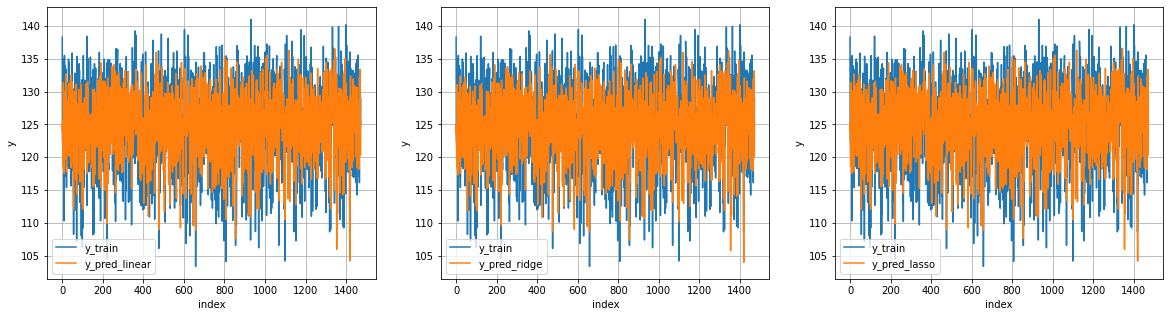

In [50]:
fig = plt.figure(figsize=(20,5))

ax = fig.add_subplot(1,3,1)
ax.set(xlabel="index",ylabel="y")
ax.plot(y_train,label="y_train")
ax.plot(y_pred_linear,label="y_pred_linear")
ax.legend(loc="best")
ax.grid()

ax = fig.add_subplot(1,3,2)
ax.set(xlabel="index",ylabel="y")
ax.plot(y_train,label="y_train")
ax.plot(y_pred_ridge,label="y_pred_ridge")
ax.legend(loc="best")
ax.grid()

ax = fig.add_subplot(1,3,3)
ax.set(xlabel="index",ylabel="y")
ax.plot(y_train,label="y_train")
ax.plot(y_pred_lasso,label="y_pred_lasso")
ax.legend(loc="best")
ax.grid()

plt.show()

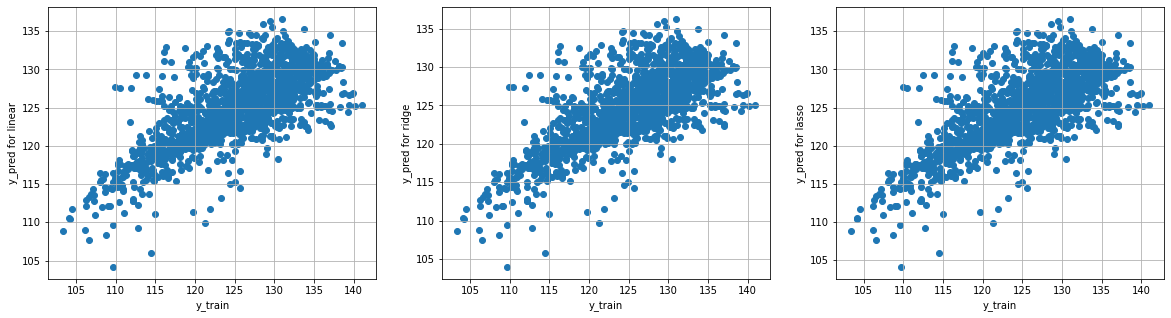

In [51]:
fig = plt.figure(figsize=(20,5))

ax = fig.add_subplot(1,3,1)
ax.set(xlabel="y_train",ylabel="y_pred for linear")
ax.scatter(y_train,y_pred_linear)
ax.grid()

ax = fig.add_subplot(1,3,2)
ax.set(xlabel="y_train",ylabel="y_pred for ridge")
ax.scatter(y_train,y_pred_ridge)
ax.grid()

ax = fig.add_subplot(1,3,3)
ax.set(xlabel="y_train",ylabel="y_pred for lasso")
ax.scatter(y_train,y_pred_lasso)
ax.grid()

plt.show()

### testing data comparison

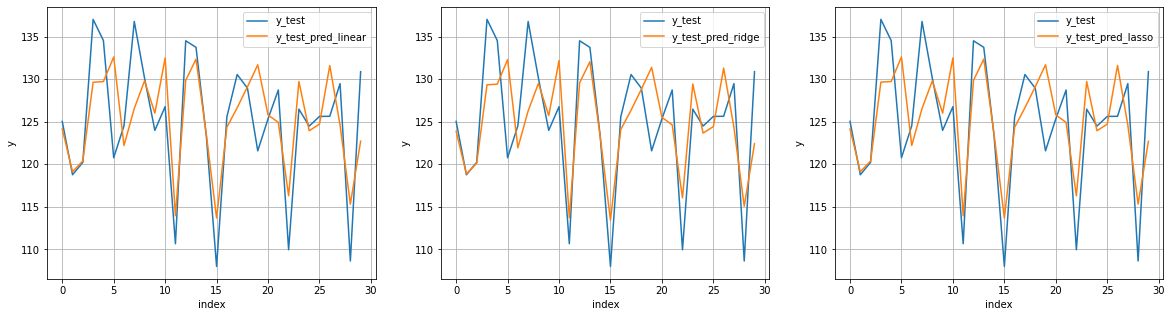

In [52]:
fig = plt.figure(figsize=(20,5))

ax = fig.add_subplot(1,3,1)
ax.set(xlabel="index",ylabel="y")
ax.plot(y_test,label="y_test")
ax.plot(y_test_pred_linear,label="y_test_pred_linear")
ax.legend(loc="best")
ax.grid()

ax = fig.add_subplot(1,3,2)
ax.set(xlabel="index",ylabel="y")
ax.plot(y_test,label="y_test")
ax.plot(y_test_pred_ridge,label="y_test_pred_ridge")
ax.legend(loc="best")
ax.grid()

ax = fig.add_subplot(1,3,3)
ax.set(xlabel="index",ylabel="y")
ax.plot(y_test,label="y_test")
ax.plot(y_test_pred_lasso,label="y_test_pred_lasso")
ax.legend(loc="best")
ax.grid()


plt.show()

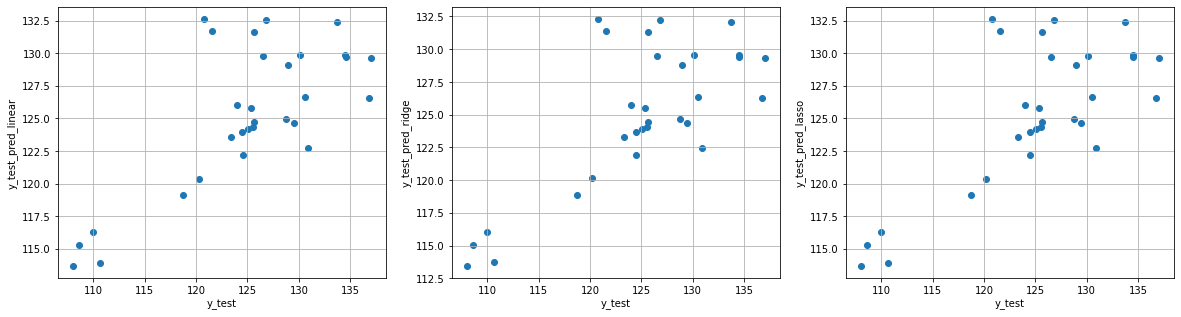

In [53]:
fig = plt.figure(figsize=(20,5))

ax = fig.add_subplot(1,3,1)
ax.set(xlabel="y_test",ylabel="y_test_pred_linear")
ax.scatter(y_test,y_test_pred_linear)
ax.grid()

ax = fig.add_subplot(1,3,2)
ax.set(xlabel="y_test",ylabel="y_test_pred_ridge")
ax.scatter(y_test,y_test_pred_ridge)
ax.grid()

ax = fig.add_subplot(1,3,3)
ax.set(xlabel="y_test",ylabel="y_test_pred_lasso")
ax.scatter(y_test,y_test_pred_lasso)
ax.grid()

plt.show()

### models comparison

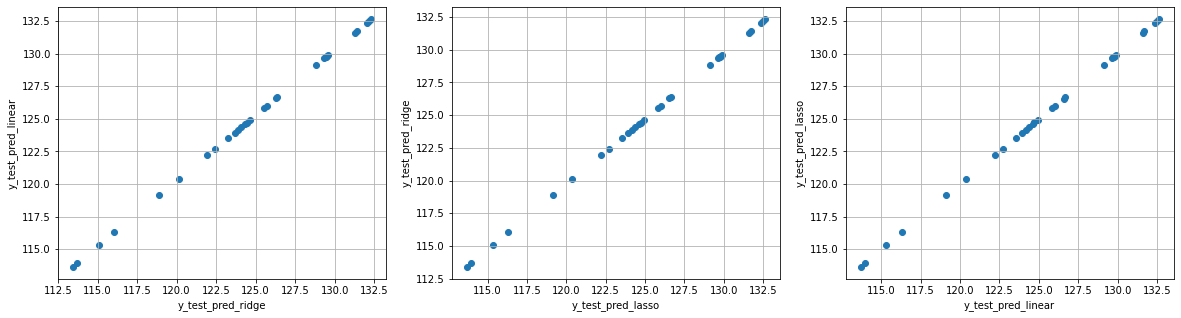

In [54]:
fig = plt.figure(figsize=(20,5))

ax = fig.add_subplot(1,3,1)
ax.set(xlabel="y_test_pred_ridge",ylabel="y_test_pred_linear")
ax.scatter(y_test_pred_ridge,y_test_pred_linear)
ax.grid()

ax = fig.add_subplot(1,3,2)
ax.set(xlabel="y_test_pred_lasso",ylabel="y_test_pred_ridge")
ax.scatter(y_test_pred_lasso,y_test_pred_ridge)
ax.grid()

ax = fig.add_subplot(1,3,3)
ax.set(xlabel="y_test_pred_linear",ylabel="y_test_pred_lasso")
ax.scatter(y_test_pred_linear,y_test_pred_lasso)
ax.grid()

plt.show()